#Mixture 3 line elements

Using Bayesian Gaussian process latent variable model with back constraints to discover different segments in the composite model Mixture 3.

Made by Ivan De Boi (ivan.deboi at uantwerpen.be, http://www.InViLab.be).

In [1]:
shape_name_string = 'Mixture 3'

# Imports

In [2]:
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

import warnings
warnings.filterwarnings('ignore')

from matplotlib import cm

!pip install GPy
import GPy
from GPy.util import pca
from GPy import kern
GPy.plotting.change_plotting_library('matplotlib')
from GPy import mappings

from sklearn.preprocessing import StandardScaler

import plotly.graph_objects as go

from numpy import genfromtxt

from google.colab import drive
from google.colab import files

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 6.9 MB/s 
     |████████████████████████████████| 71 kB 8.7 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565118 sha256=a1a380237a133fe4afaaf73801b9aad7685c02f5cc0f5e14d273fabf28dfb377
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=677b70952747fef4b73a98e8f397b2281cae99bf2f900294edd9d0ae3f64301a
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [3]:
#use this to adjust the resolution of the pictures etc.
#print(plt.rcParams)  # it will tell you all default setting in Matplotlib
print(plt.rcParams.get('figure.figsize'))
plt.rcParams['figure.figsize'] = [8,6]
print(plt.rcParams.get('figure.figsize'))
print(plt.rcParams.get('figure.dpi'))
plt.rcParams['figure.dpi'] = 72.0*3
print(plt.rcParams.get('figure.dpi'))

[6.0, 4.0]
[8.0, 6.0]
72.0
216.0


# Data

In [4]:
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive/PhD 3D Sensing/05 GPLVM on set of lines/Line Elements Surface/Line Elements/'  #change dir to your project folder

Mounted at /content/gdrive


In [5]:
data = genfromtxt(root_path + shape_name_string + ' line elements.csv', delimiter=',')
shape_name_string
Y = data[:,:]
print(Y[0:3,:])
print(Y.shape)

[[ 8.86037707e-01  4.63613302e-01 -1.34795564e-05  3.70241731e-01
  -7.07578361e-01  4.01133776e-01  2.55729288e-01]
 [ 8.86037707e-01  4.63613242e-01 -1.34795628e-05  3.70242238e-01
  -7.07578063e-01  4.44985509e-01  2.55729318e-01]
 [ 8.86037707e-01  4.63613242e-01 -1.38234072e-05  3.79190415e-01
  -7.24679172e-01  4.44985539e-01  2.55729556e-01]]
(15681, 7)


# PCA

In [6]:
# Normalize
scaler = StandardScaler()
scaler.fit(Y)

Yn = scaler.transform(Y)
print(Yn[0:3, :])

# Sanity checks
print("mean y:",Y.mean())
print("std y:", Y.std())
print("mean yn:", Yn.mean())
print("std yn:", Yn.std())

[[ 1.39959013  0.85597281 -0.18624314  0.88468167 -1.48585476  1.28242863
  -0.18821579]
 [ 1.39959013  0.8559727  -0.18624314  0.88468288 -1.48585414  1.42262312
  -0.18821572]
 [ 1.39959013  0.8559727  -0.18624377  0.90606425 -1.52176497  1.42262321
  -0.18821511]]
mean y: 0.06163997946651716
std y: 0.49841085340257774
mean yn: 2.796418430387669e-17
std yn: 1.0000000000000002


In [7]:
points = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
  p = np.cross(Y[i,0:3], Y[i,3:6]) + Y[i,6]*Y[i,0:3]
  points[i,:] = p

print(points)
print(points.shape)

labels = points[:,2]*0
labels[np.where(points[:,2] < 0.61)] = 2
labels[np.where(points[:,2] < 0)] = 4
labels[np.where(points[:,2] < -0.61)] = 6

print(labels)
print(labels.shape)

fig = go.Figure(data=[go.Scatter3d(x=points[:, 0], y=points[:, 1], z=points[:, 2],
                                   mode='markers',
                                   marker=dict(size=2, color = labels, colorscale='Spectral',opacity=0.8)
                                   )])
fig.show(figsize=(20, 20))
plt.figure(figsize=(30, 30))

[[ 0.41254721 -0.23686514 -0.79859355]
 [ 0.43287745 -0.27571943 -0.7985935 ]
 [ 0.4328772  -0.2757196  -0.8178943 ]
 ...
 [-0.41805542  0.44874517  0.63028459]
 [-0.39499877  0.4681972   0.63028455]
 [-0.37194218  0.48764925  0.6302846 ]]
(15681, 3)
[6. 6. 6. ... 0. 0. 0.]
(15681,)


<Figure size 6480x6480 with 0 Axes>

<Figure size 6480x6480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

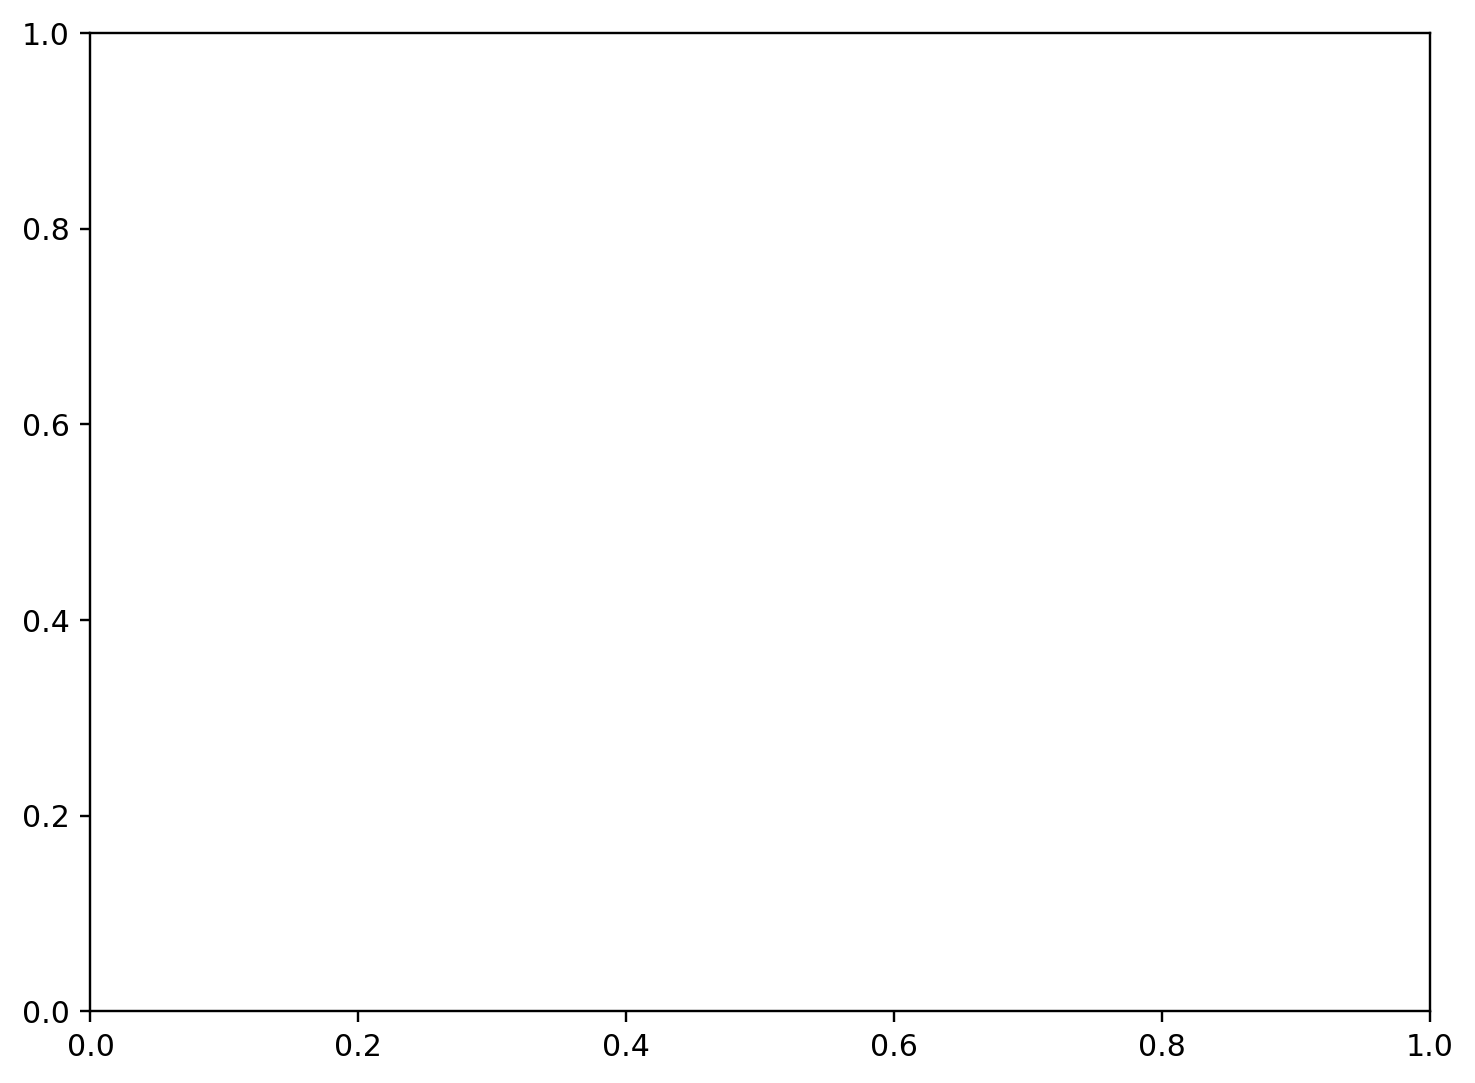

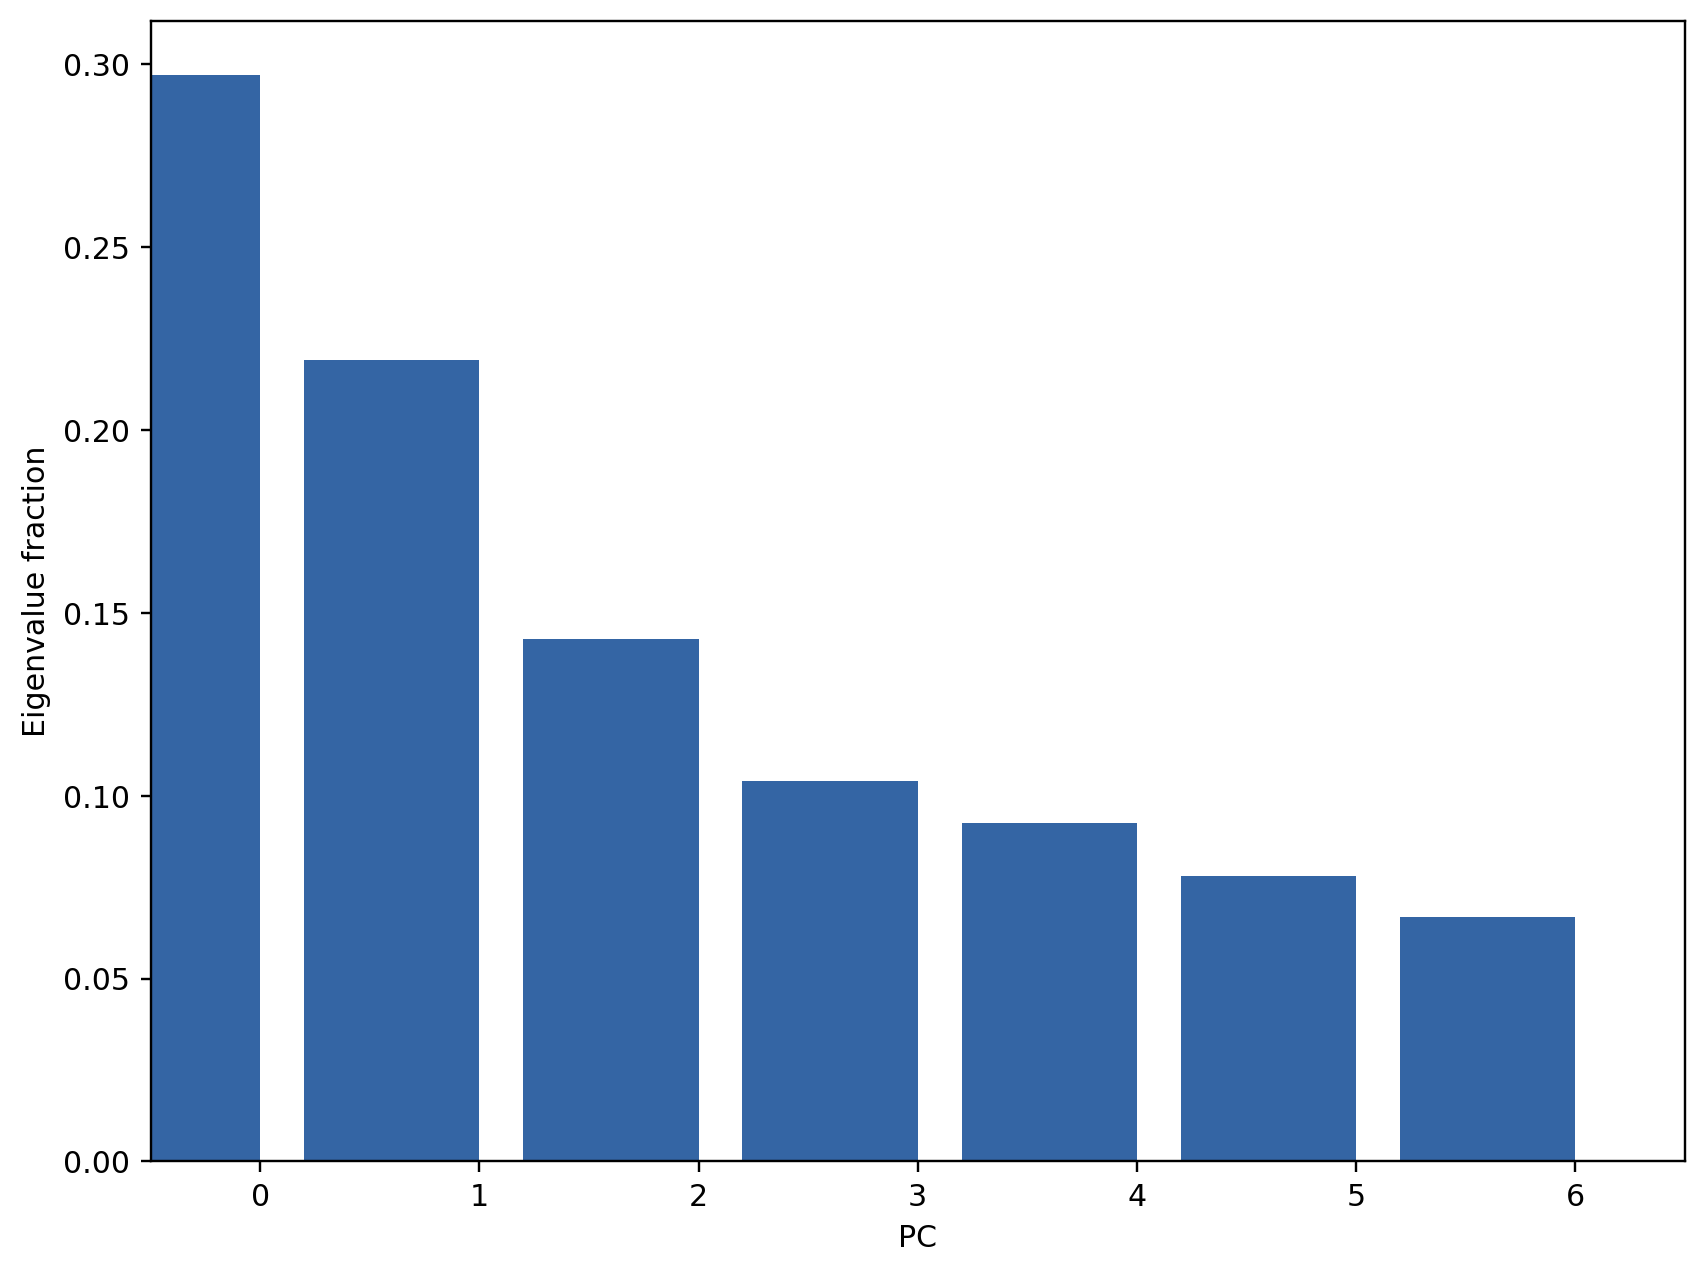

In [8]:
p = pca.PCA(Yn)
# plot first xxx eigenvalue fractions

fig, ax = plt.subplots()
p.plot_fracs(Yn.shape[1]) 

filename = shape_name_string + ' PCA.png'
plt.savefig(filename)
files.download('/content/' + filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

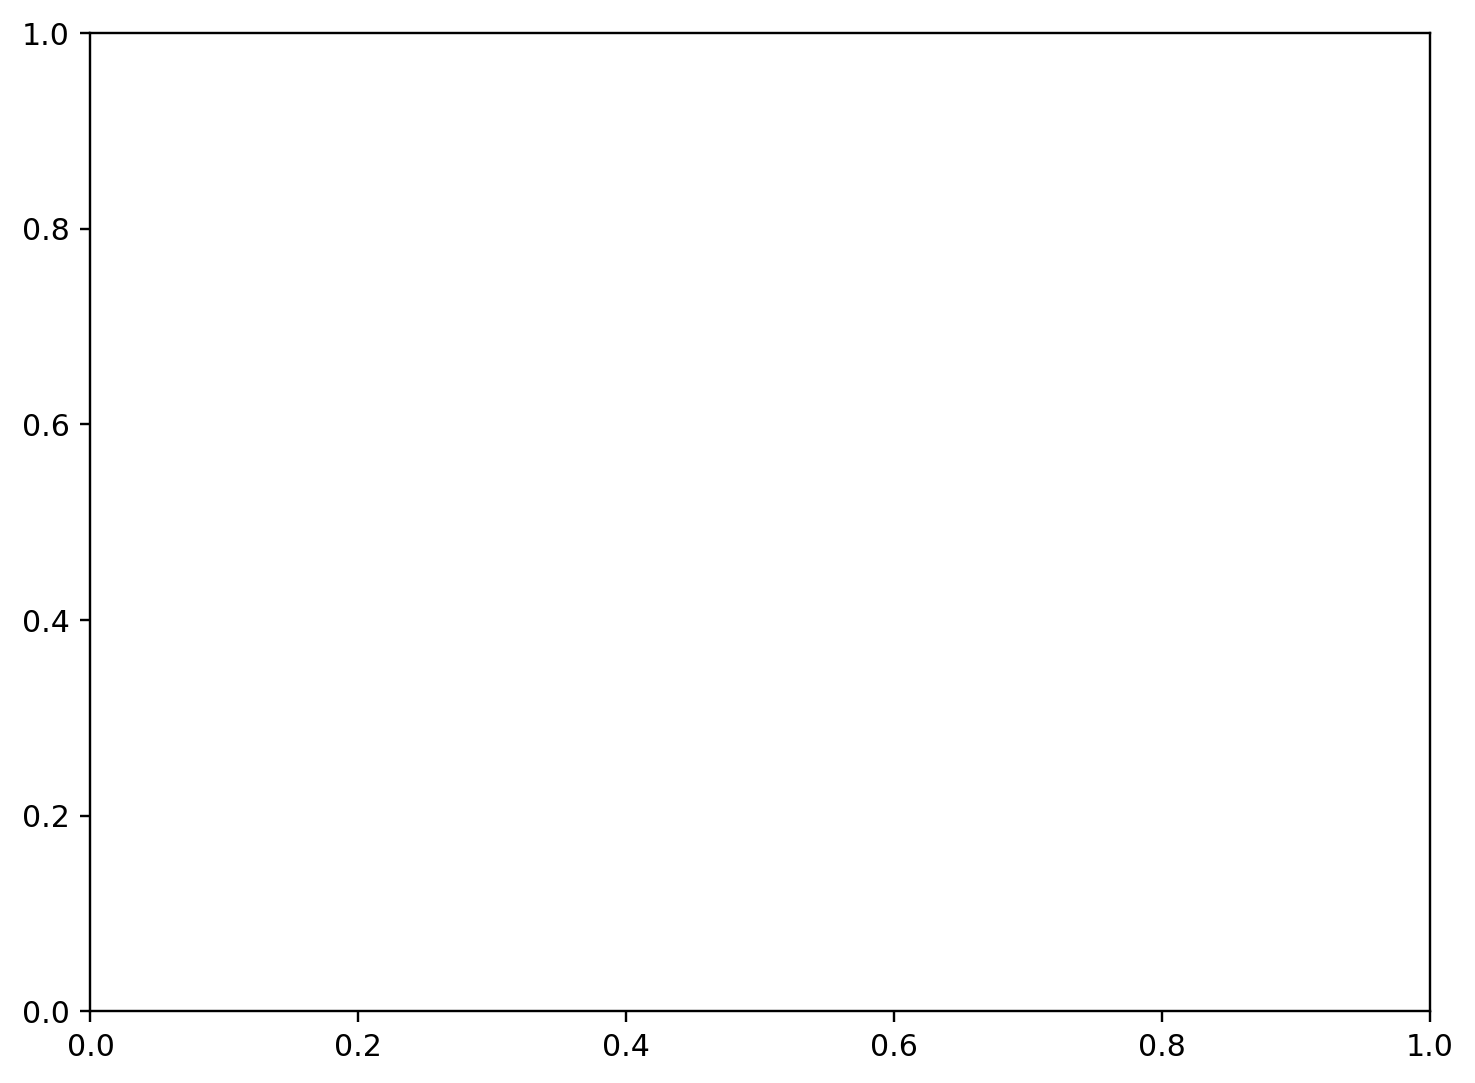

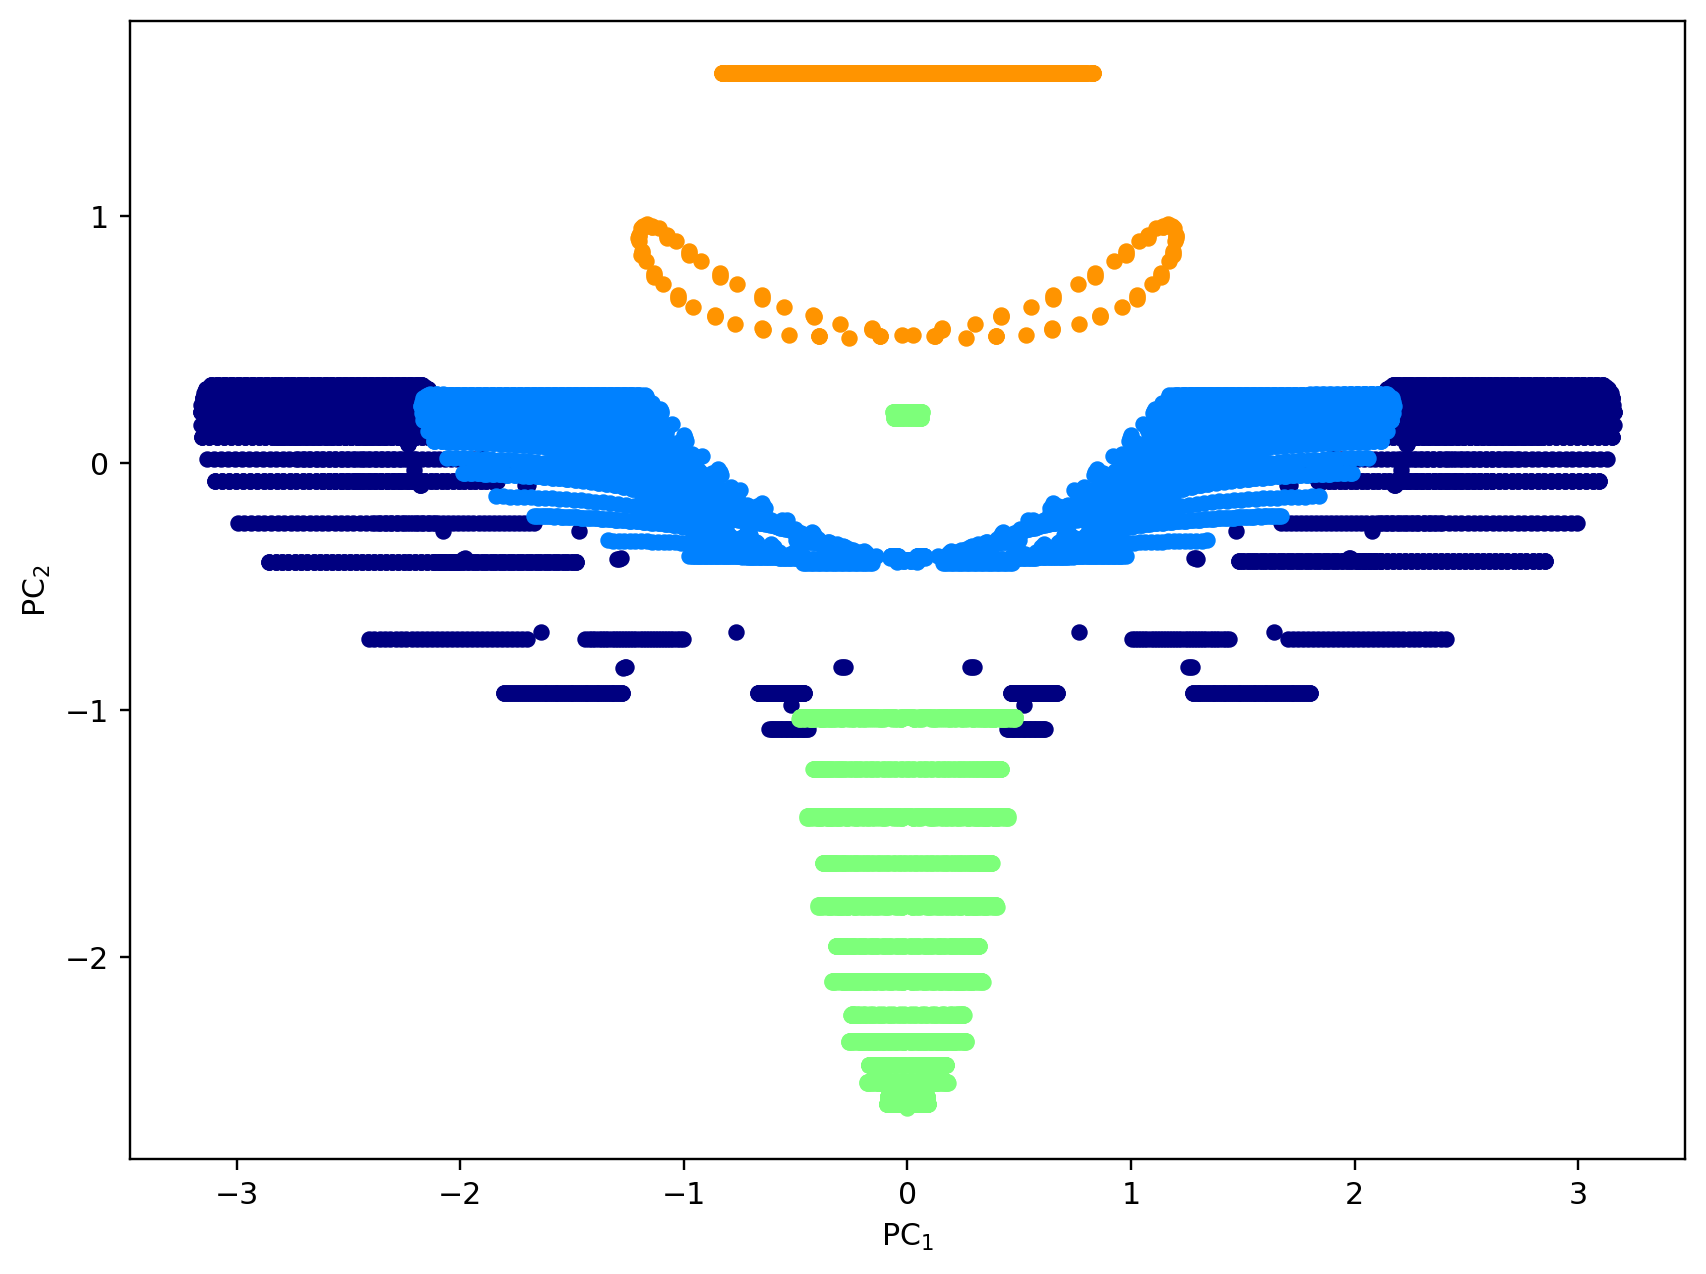

In [9]:
# plot the latent space by PCA

fig, ax = plt.subplots()
p.plot_2d(Yn, labels = labels)

filename = shape_name_string + ' 2D PCA.png'
plt.savefig(filename)
files.download('/content/' + filename)

# BCGPLVM

In [10]:
print(Y[0:3,:])

[[ 8.86037707e-01  4.63613302e-01 -1.34795564e-05  3.70241731e-01
  -7.07578361e-01  4.01133776e-01  2.55729288e-01]
 [ 8.86037707e-01  4.63613242e-01 -1.34795628e-05  3.70242238e-01
  -7.07578063e-01  4.44985509e-01  2.55729318e-01]
 [ 8.86037707e-01  4.63613242e-01 -1.38234072e-05  3.79190415e-01
  -7.24679172e-01  4.44985539e-01  2.55729556e-01]]


In [11]:
max_nr_of_data_points = 1000 #use this line to subsample
#max_nr_of_data_points = Y.shape[0]
Y = Y[np.random.choice(Y.shape[0], max_nr_of_data_points, replace=False), :] #permutation on the datapoints
print(Y[0:3,:])


[[-0.85658288 -0.32412106  0.40151125 -0.00755967  0.05189396  0.02576378
   0.0258444 ]
 [ 0.57675028  0.72255945  0.38113901 -0.36184579  0.30268449 -0.02627085
   0.81856418]
 [-0.06180832 -0.72887474 -0.68185133  0.39390364 -0.04295645  0.01021242
   0.0183232 ]]


(1000, 3)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

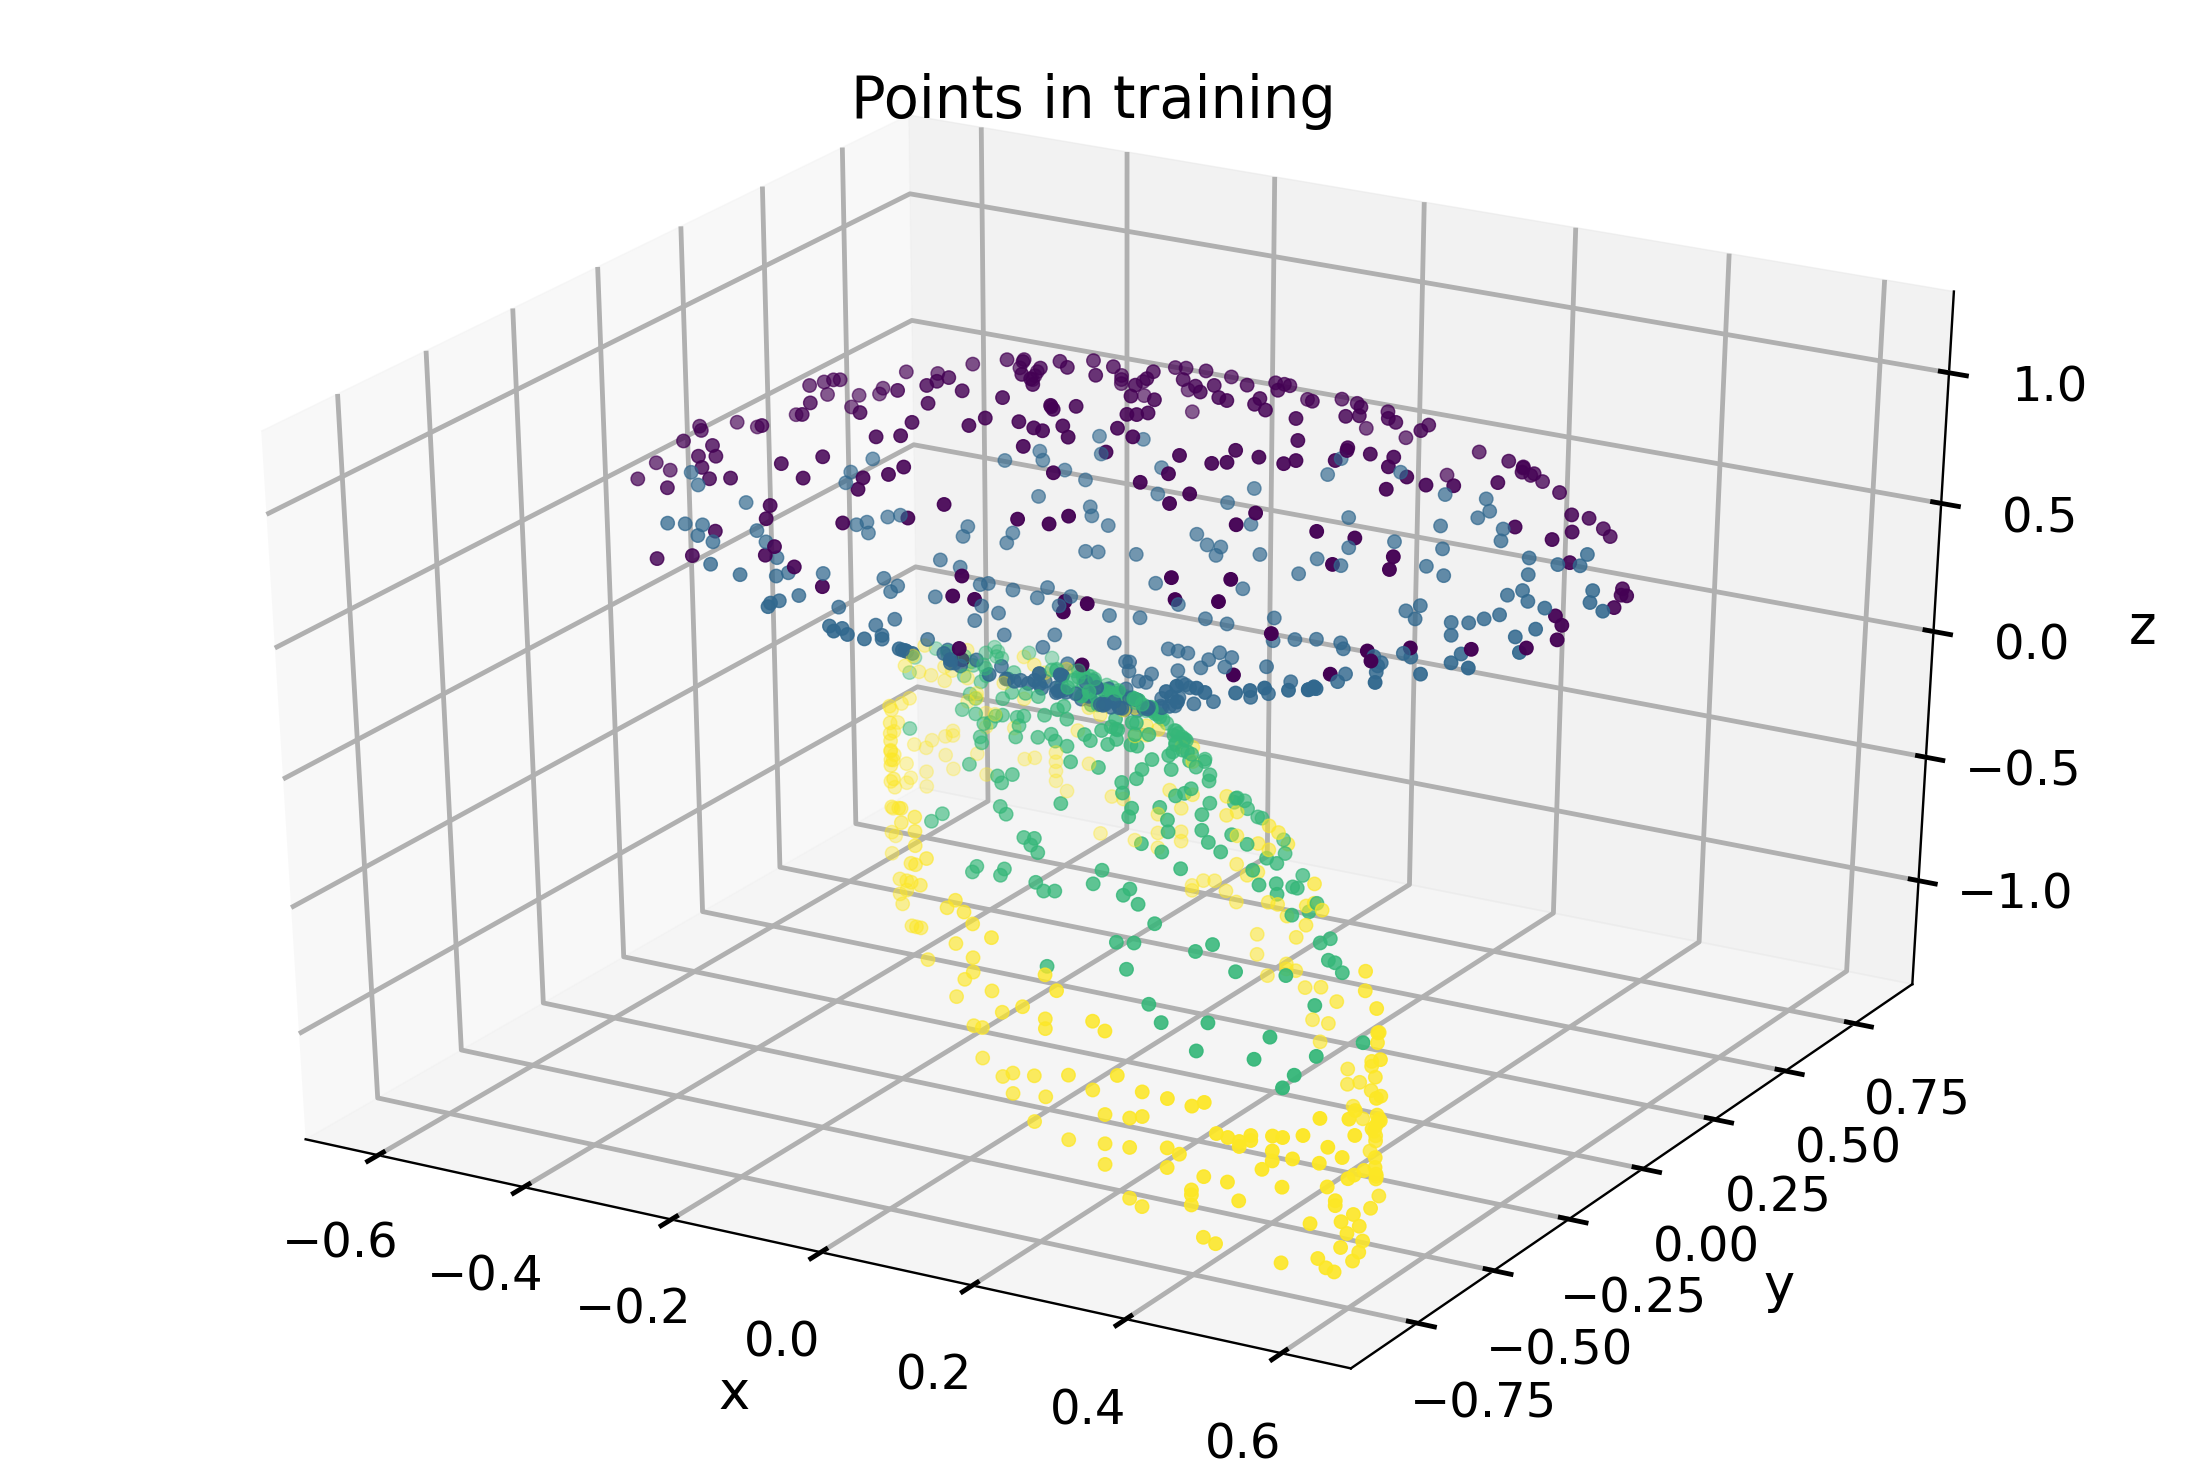

In [12]:
points = np.zeros((Y.shape[0], 3))
for i in range(Y.shape[0]):
  p = np.cross(Y[i,0:3], Y[i,3:6]) + Y[i,6]*Y[i,0:3] #calculate the points from the line elements
  points[i,:] = p
print(points.shape)

labels = points[:,2]*0
labels[np.where(points[:,2] < 0.61)] = 0.25
labels[np.where(points[:,2] < 0)] = 0.5
labels[np.where(points[:,2] < -0.61)] = 0.75

plt.style.use('seaborn-poster')
ax = plt.axes(projection='3d')

ax.scatter3D(points[:, 0], points[:,1], points[:, 2], c = labels)
ax.set_title('Points in training')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

filename = shape_name_string + ' points in training.png'
plt.savefig(filename)
files.download('/content/' + filename)

plt.show(ax)

In [13]:
#use this to create an interactive 3D plot, use mouse buttons to translate, rotate and zoom
fig = go.Figure(data=[go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:, 2],
                                   mode='markers',
                                   marker=dict(size=5, color = labels, colorscale='Rainbow',opacity=1.0)
                                   )])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=4
    ),
)
fig.show( )

In [14]:
max_nr_of_iters = 25000

init='PCA'
#init='random'

likelihood_variance = 1e-4
likelihood_variance_fix = True 

optimizer = 'scg'
optimizer = 'lbfgs'
#optimizer = 'tnc'

num_restarts = 3

input_dim = 7 #Y.shape[1]
num_inducing= 25

In [15]:
mapping = mappings.MLP(input_dim=Y.shape[1], output_dim=input_dim, hidden_dim=5)

# back_kernel = GPy.kern.RBF(Y.shape[1], ARD = True) #this is more smooth mapping
# mapping = GPy.mappings.Kernel(input_dim = Y.shape[1], Z=Y, output_dim=input_dim, kernel=back_kernel)

In [16]:
k_GPLVM = GPy.kern.RBF(input_dim, ARD = True)

m_GPLVM = GPy.models.BCGPLVM(Y, input_dim, kernel=k_GPLVM, mapping = mapping)

if likelihood_variance_fix:
  m_GPLVM.likelihood.variance = likelihood_variance
  m_GPLVM.likelihood.variance.fix()

m_GPLVM.optimize_restarts(messages=1, num_restarts=num_restarts, max_iters=max_nr_of_iters, optimizer = optimizer) 
print(m_GPLVM) 

Optimization restart 1/3, f = -22931.90582765415


Optimization restart 2/3, f = -23030.227333108673


Optimization restart 3/3, f = -22879.06155491043

Name : GPLVM
Objective : -23030.227333108673
Number of Parameters : 91
Number of Optimization Parameters : 90
Updates : True
Parameters:
  GPLVM.                   |               value  |  constraints  |  priors
  rbf.variance             |  3.9490296493903454  |      +ve      |        
  rbf.lengthscale          |                (7,)  |      +ve      |        
  Gaussian_noise.variance  |              0.0001  |   +ve fixed   |        
  mlpmap.W1                |              (7, 5)  |               |        
  mlpmap.b1                |                (5,)  |               |        
  mlpmap.W2                |              (5, 7)  |               |        
  mlpmap.b2                |                (7,)  |               |        


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

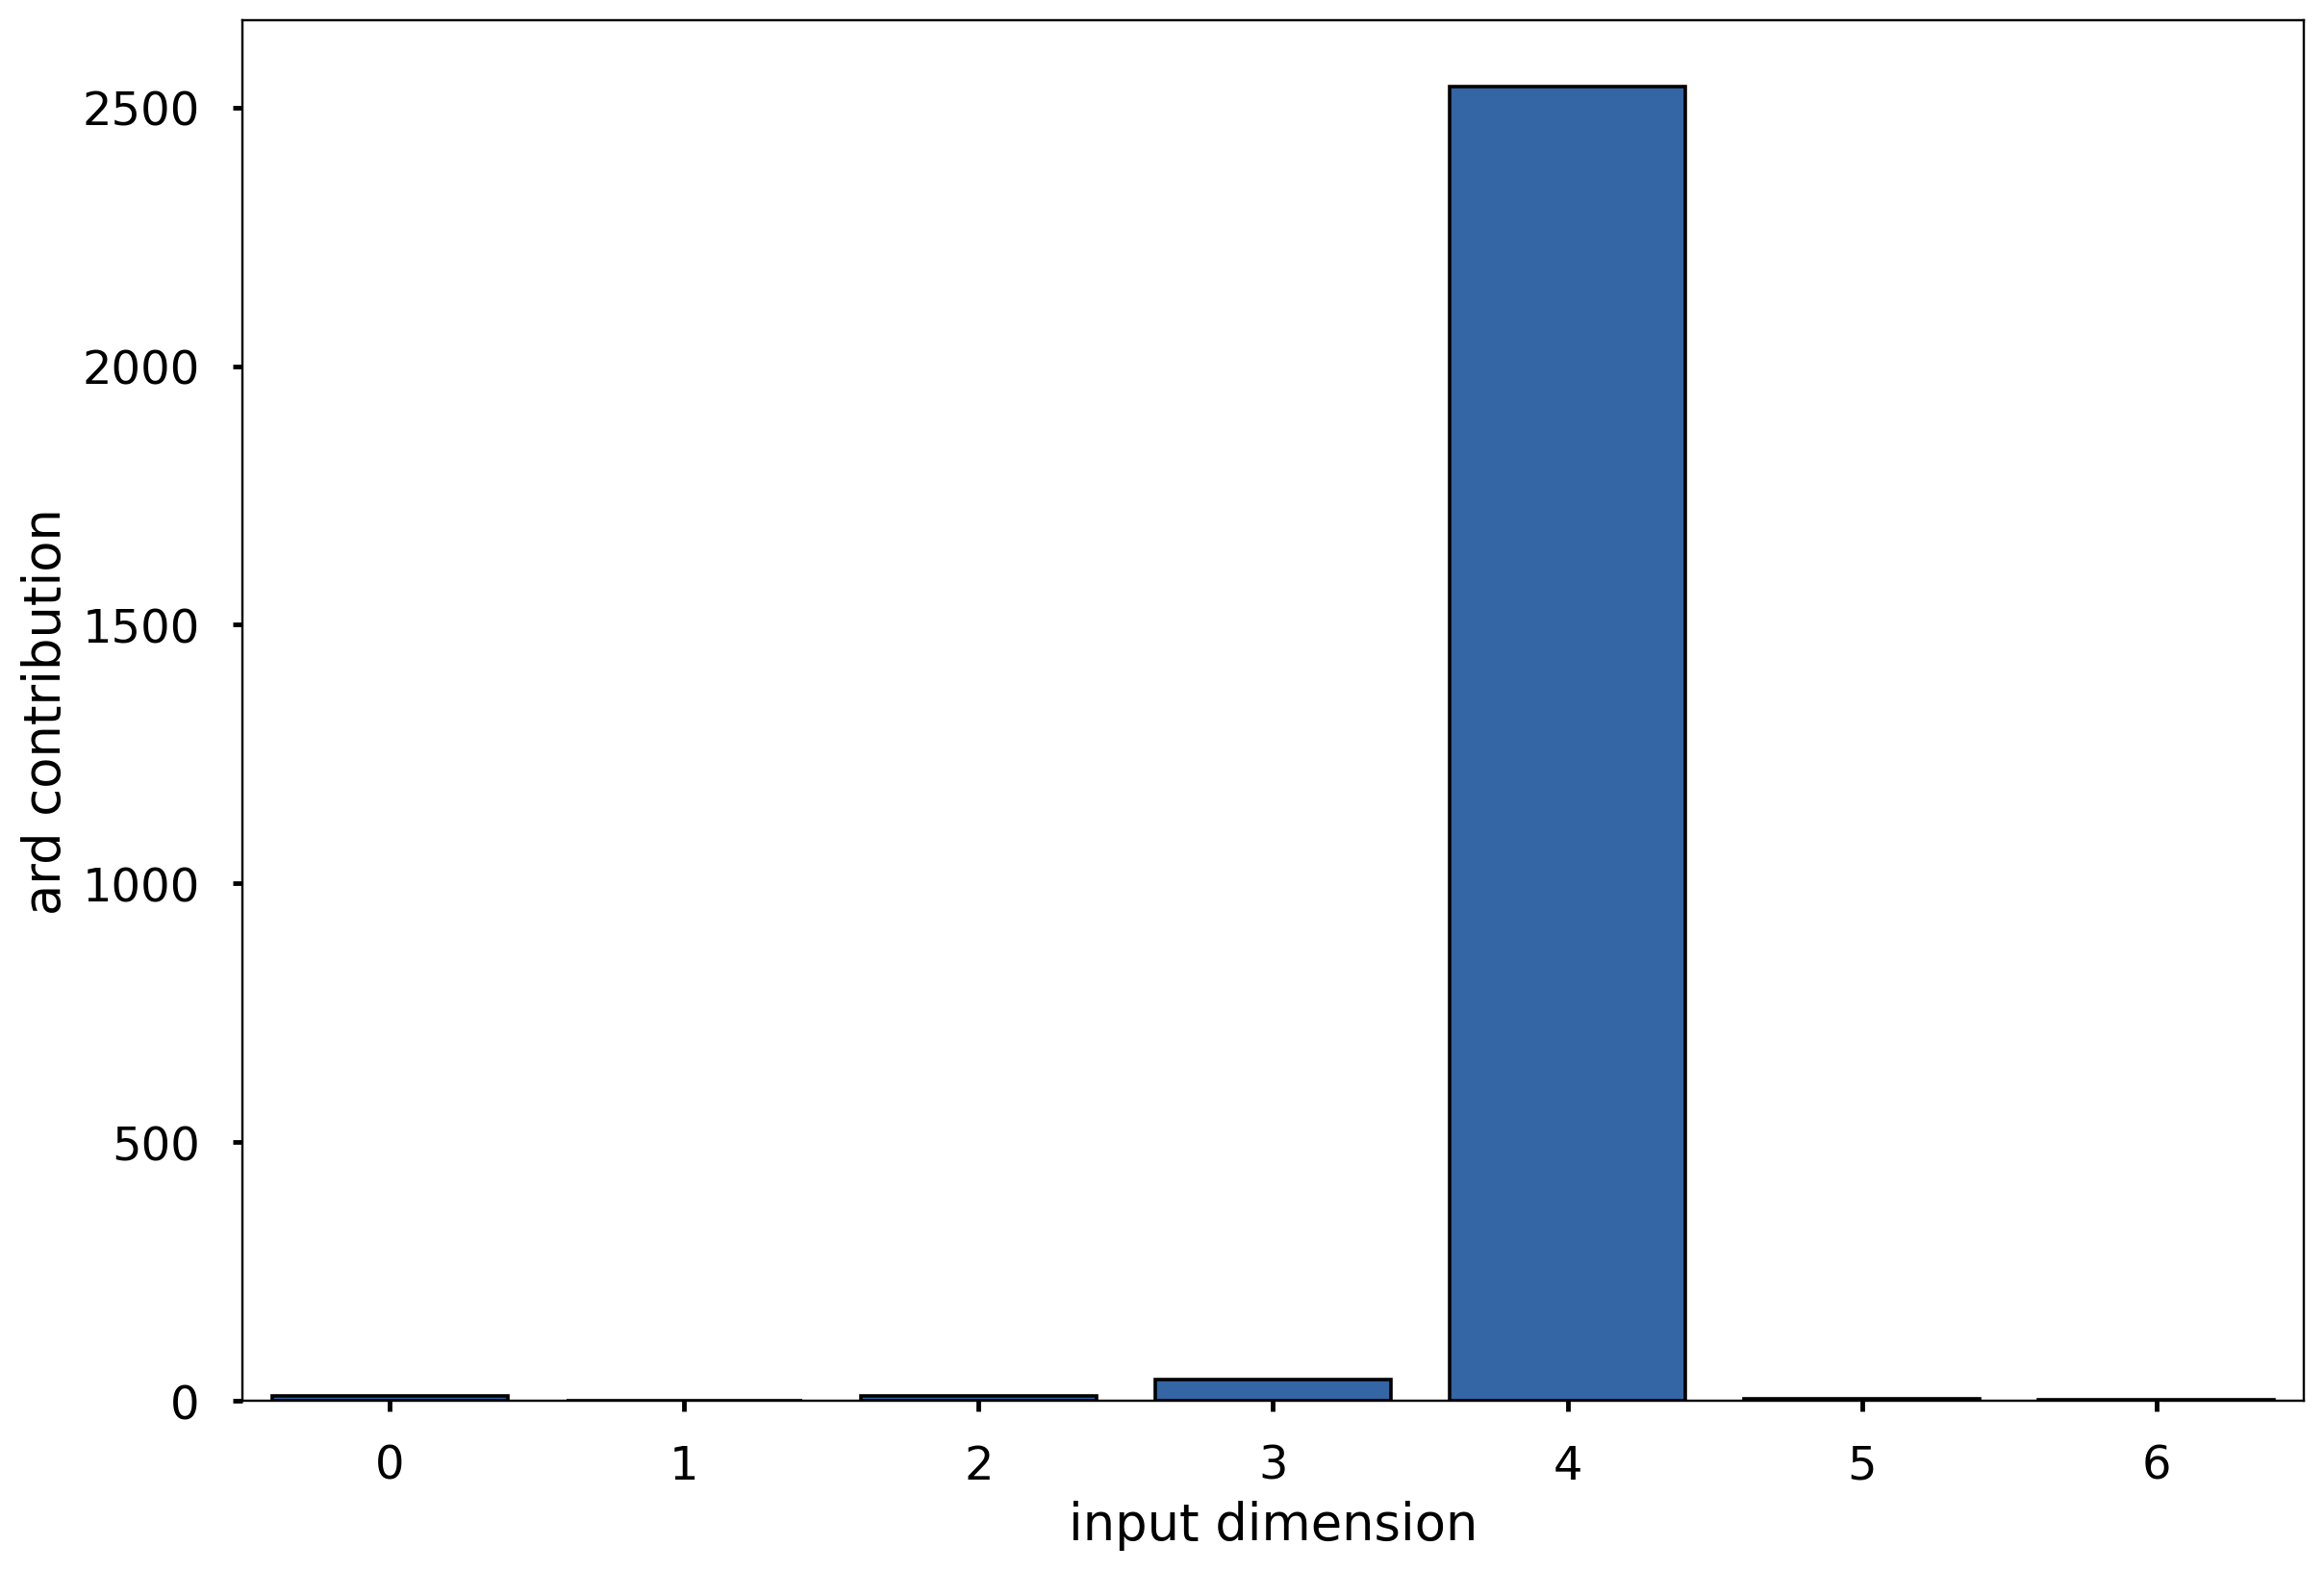

In [17]:
fig, ax = plt.subplots() 
m_GPLVM.kern.plot_ARD(ax=ax)

filename = shape_name_string + ' ARD.png'
plt.savefig(filename)
files.download('/content/' + filename)

In [18]:
m_GPLVM.kern.lengthscale #which is the inverse of ARD contribution

index,GPLVM.rbf.lengthscale,constraints,priors
[0],0.64559981,+ve,
[1],2.57396881,+ve,
[2],0.63000097,+ve,
[3],0.30538819,+ve,
[4],0.03942212,+ve,
[5],0.87862003,+ve,
[6],1.54571747,+ve,


In [19]:
lengthscales = m_GPLVM.kern.lengthscale.argsort()
input_dimension_1 =lengthscales[0]
input_dimension_2 =lengthscales[1]
input_dimension_3 =lengthscales[2]

print(input_dimension_1)
print(input_dimension_2)
print(input_dimension_3)

4
3
2


In [20]:
latent = m_GPLVM.X

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

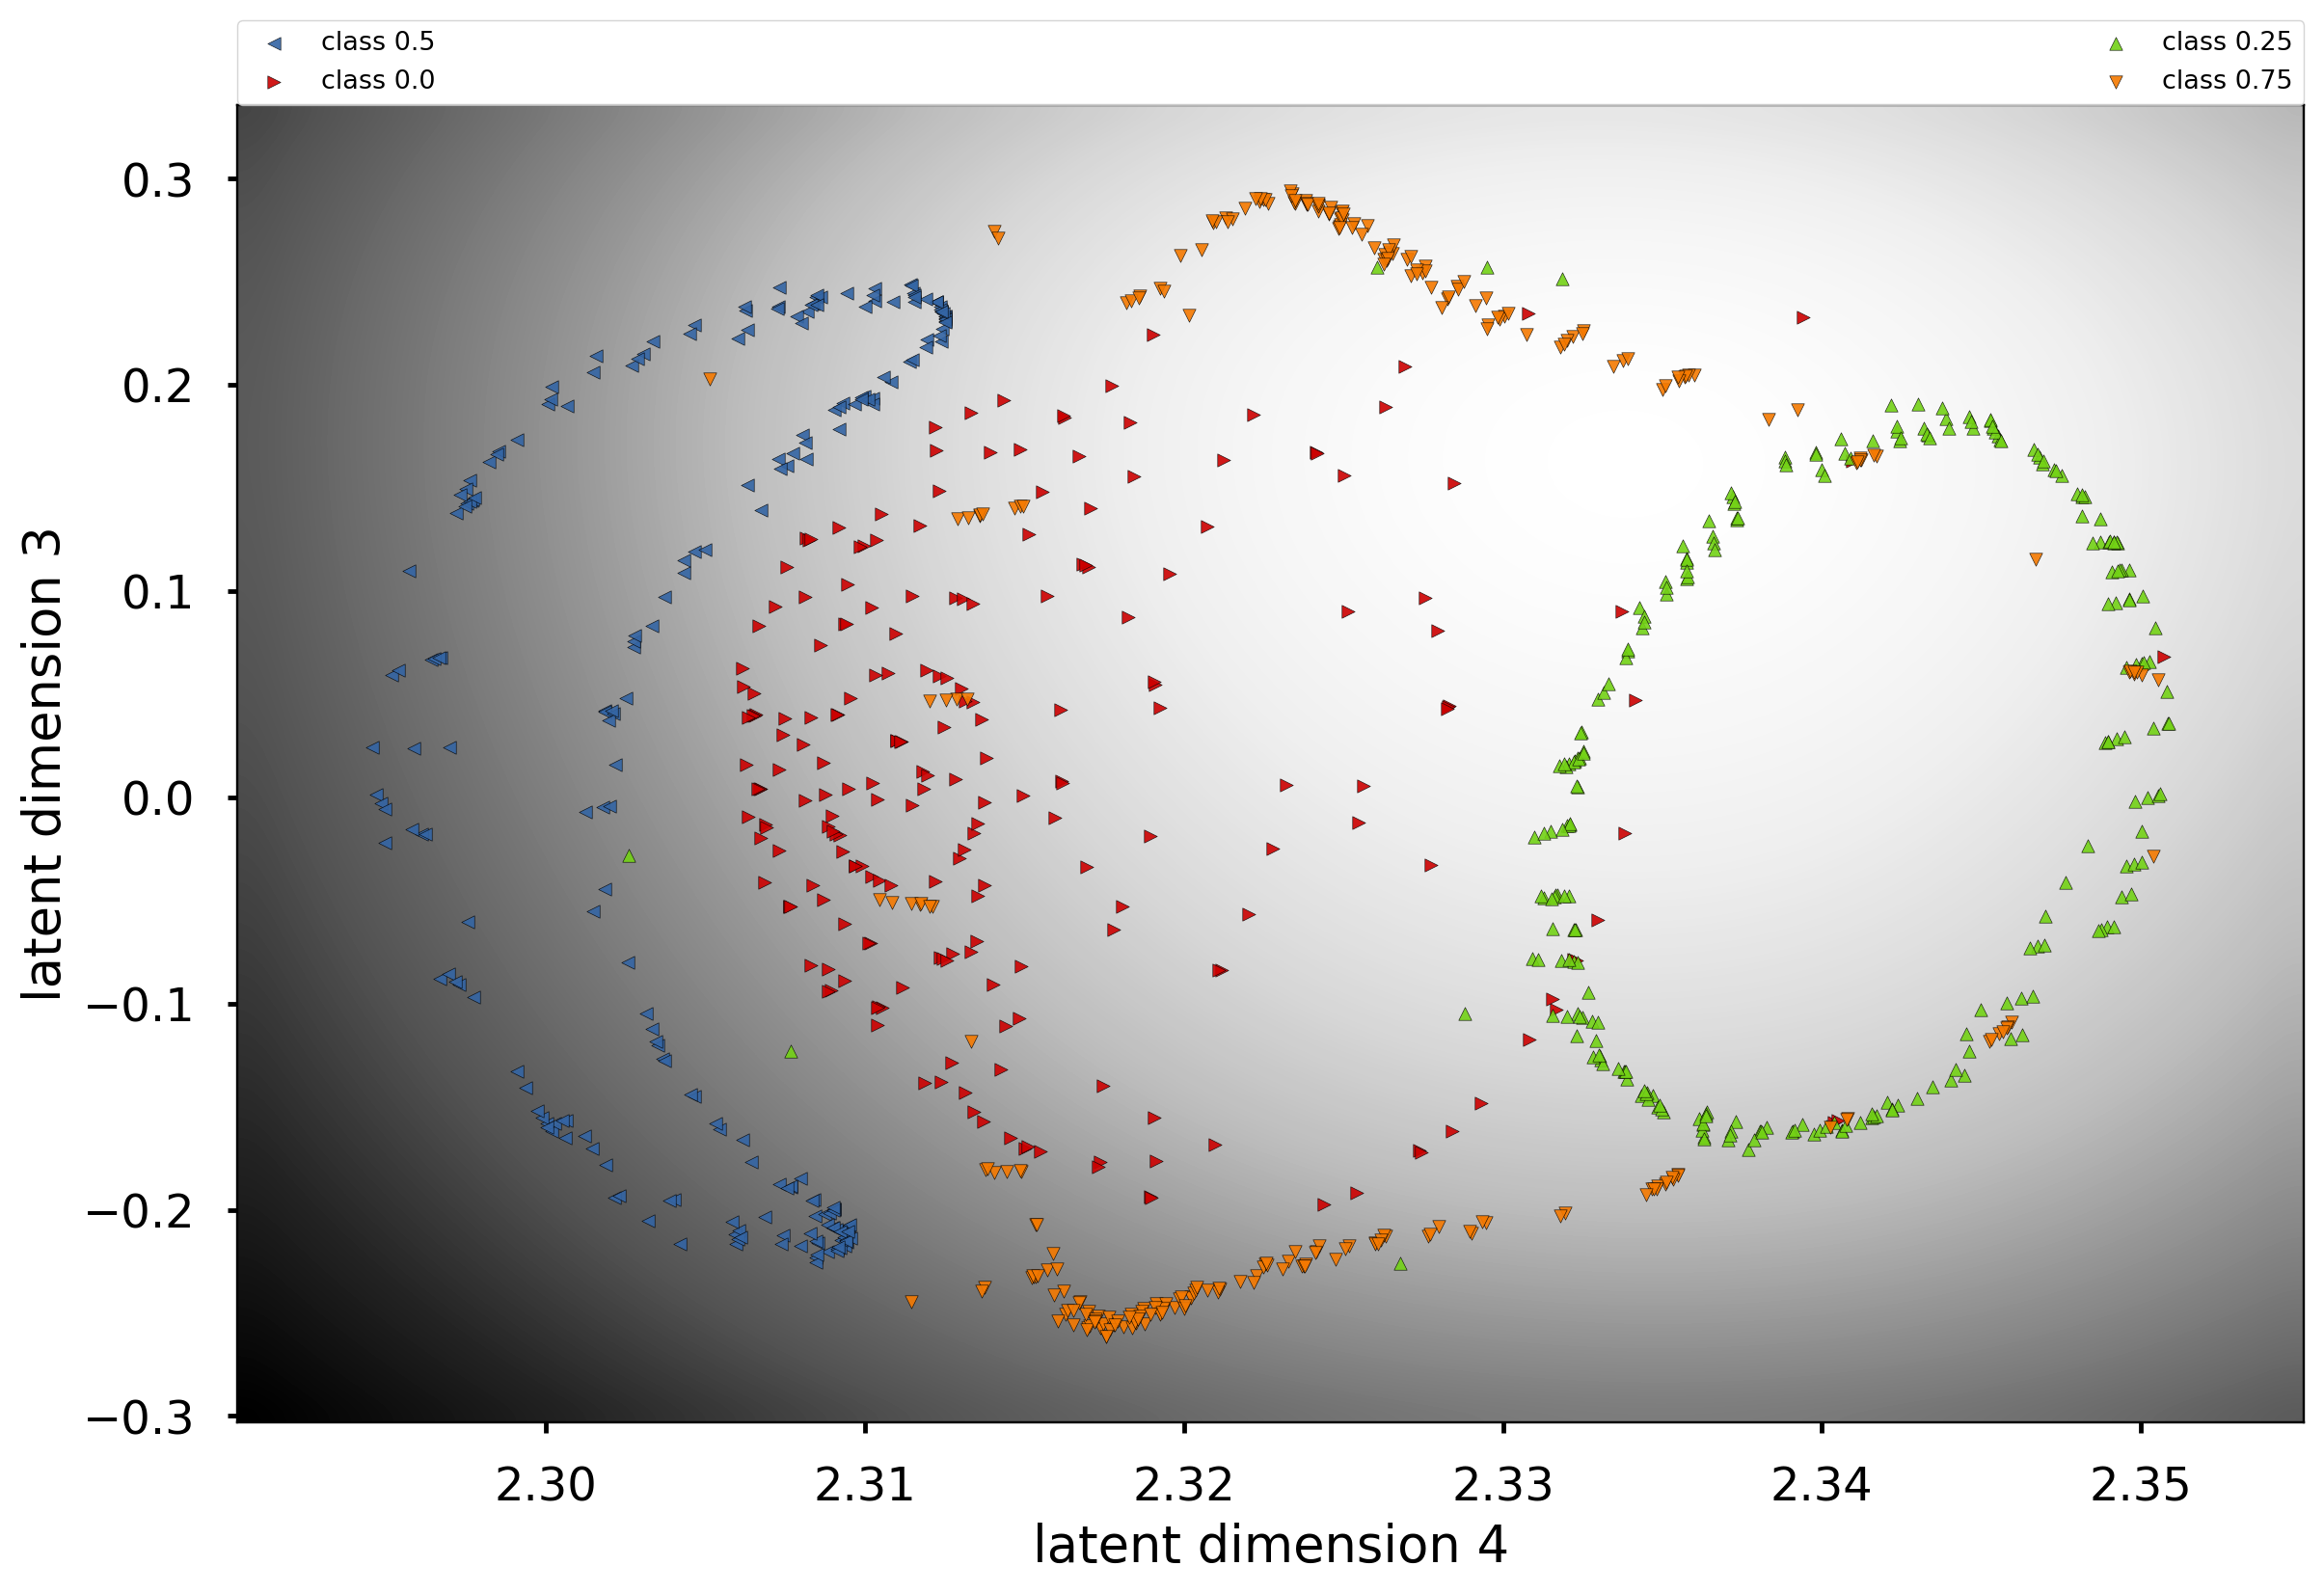

In [21]:
fig, ax = plt.subplots()
#ax.set_title('2D latent space')
m_GPLVM.plot_latent(labels = labels, ax=ax, updates=False, legend =True)
filename = shape_name_string + ' 2D latent.png'
plt.savefig(filename)
files.download('/content/' + filename)

In [22]:
#use this to create an interactive 3D plot, use mouse buttons to translate, rotate and zoom
fig = go.Figure(data=[go.Scatter3d(x=latent[:,input_dimension_1], y=latent[:,input_dimension_2], z=latent[:, input_dimension_3],
                                   mode='markers',
                                   marker=dict(size=2, color = labels, colorscale='Rainbow',opacity=0.8)
                                   )])
fig.update_layout(
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10,
        pad=4
    ),
)
fig.show( )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

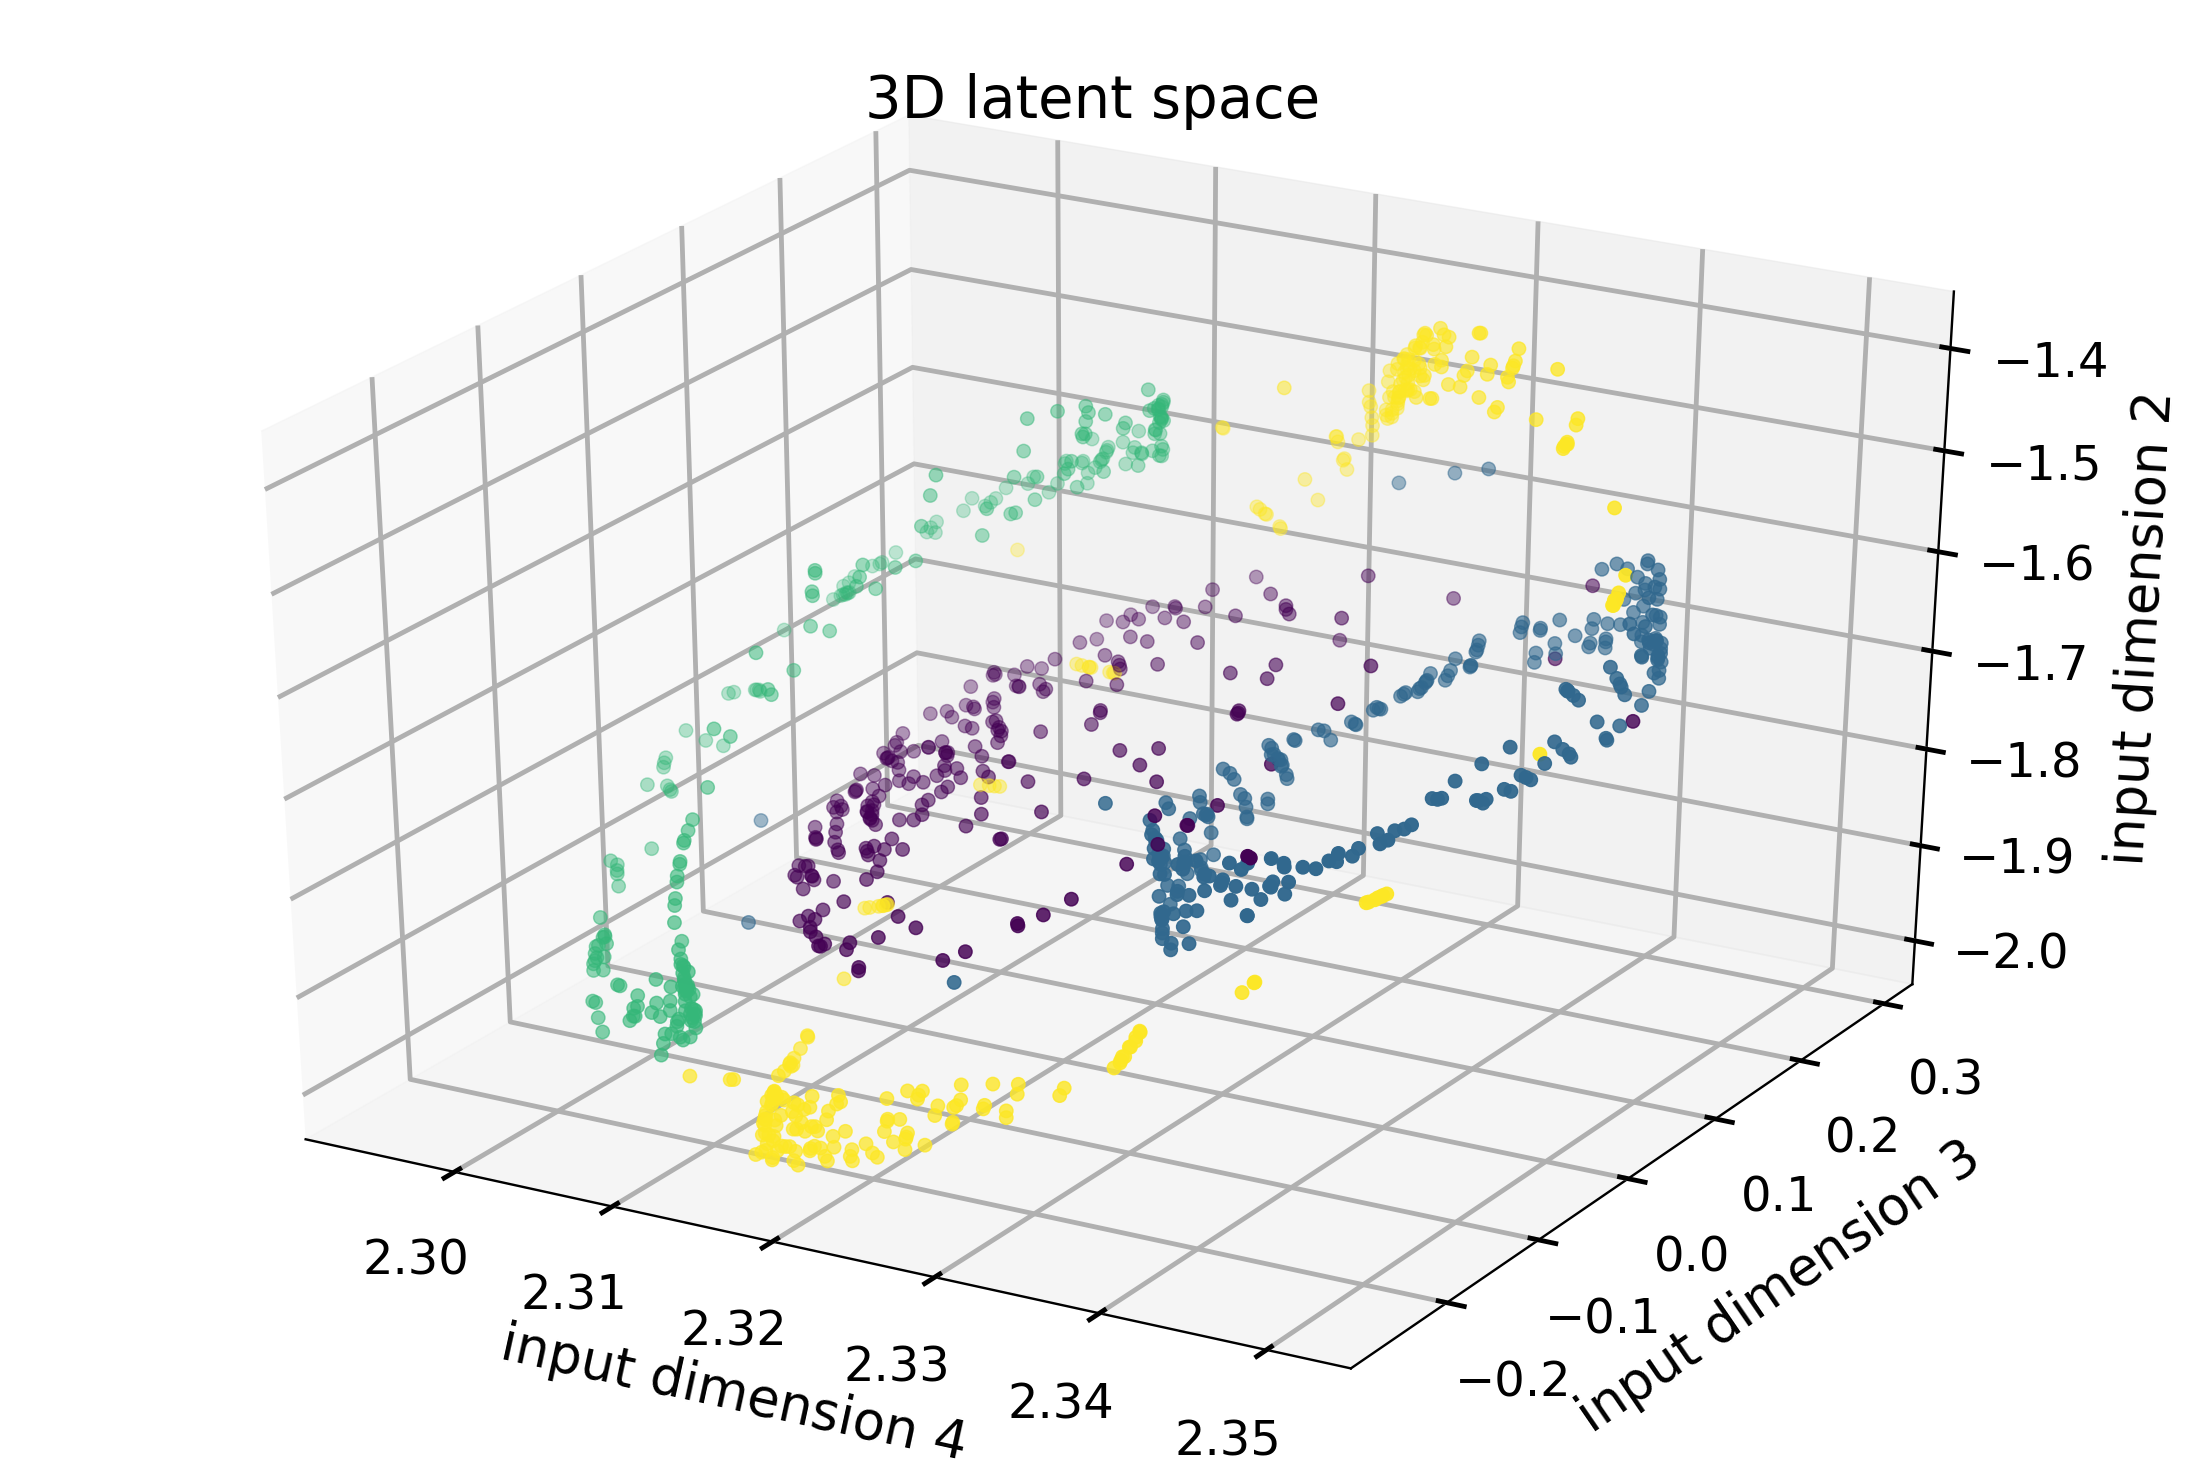

In [23]:
plt.style.use('seaborn-poster')
ax = plt.axes(projection='3d')

ax.scatter3D(latent[:, input_dimension_1], latent[:,input_dimension_2], latent[:, input_dimension_3], c = labels)
ax.set_title('3D latent space')

# Set axes label
ax.set_xlabel('input dimension ' + str(input_dimension_1), labelpad=20)
ax.set_ylabel('input dimension ' + str(input_dimension_2), labelpad=20)
ax.set_zlabel('input dimension ' + str(input_dimension_3), labelpad=20)

filename = shape_name_string + ' 3D latent.png'
plt.savefig(filename)
files.download('/content/' + filename)

plt.show(ax)



#Save/load the model

In [24]:
# 1: Saving a model:
filename = shape_name_string + ' BCGPLVM.npy'
np.save(filename, m_GPLVM.param_array)
files.download('/content/' + filename)
print(m_GPLVM)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Name : GPLVM
Objective : -23030.227333108673
Number of Parameters : 91
Number of Optimization Parameters : 90
Updates : True
Parameters:
  GPLVM.                   |               value  |  constraints  |  priors
  rbf.variance             |  3.9490296493903454  |      +ve      |        
  rbf.lengthscale          |                (7,)  |      +ve      |        
  Gaussian_noise.variance  |              0.0001  |   +ve fixed   |        
  mlpmap.W1                |              (7, 5)  |               |        
  mlpmap.b1                |                (5,)  |               |        
  mlpmap.W2                |              (5, 7)  |               |        
  mlpmap.b2                |                (7,)  |               |        


In [25]:
# 2: loading a model
# Model creation, without initialization:
m_load = GPy.models.BCGPLVM(Y, input_dim, kernel=k_GPLVM, mapping = mapping, initialize=False)
m_load.update_model(False) # do not call the underlying expensive algebra on load
m_load.initialize_parameter() # Initialize the parameters (connect the parameters up)
m_load[:] = np.load(filename) # Load the parameters
m_load.update_model(True) # Call the algebra only once
print(m_load)


Name : GPLVM
Objective : -23030.227333108673
Number of Parameters : 91
Number of Optimization Parameters : 91
Updates : True
Parameters:
  GPLVM.                   |               value  |  constraints  |  priors
  rbf.variance             |  3.9490296493903454  |      +ve      |        
  rbf.lengthscale          |                (7,)  |      +ve      |        
  Gaussian_noise.variance  |              0.0001  |      +ve      |        
  mlpmap.W1                |              (7, 5)  |               |        
  mlpmap.b1                |                (5,)  |               |        
  mlpmap.W2                |              (5, 7)  |               |        
  mlpmap.b2                |                (7,)  |               |        
